In [13]:
# Coded By:       Ethan Pattison
# FSU Course:     DSAN 799 Capstone
# Professor:      Dr Abusharkh
# Title:          Capstone Project
# Date:           06/1/2023

In [14]:
# import packages and functions 

import pandas as pd
import numpy as np
from numpy import array
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.compose import make_column_transformer
import joblib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

        
# Link the Database to the Python file so the program has the information needed

df = pd.read_csv('heart_2020_cleaned.csv', sep=',')

df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


In [15]:
# Check for missing Values

df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [16]:
# There are many different Age categories so group into 4 different

df['AgeCategory']=df['AgeCategory'].replace(['18-24','25-29'],'Young')
df['AgeCategory']=df['AgeCategory'].replace(['30-34','35-39','40-44','45-49'],'Adult')
df['AgeCategory']=df['AgeCategory'].replace(['50-54','55-59','60-64','65-69'],'Old')
df['AgeCategory']=df['AgeCategory'].replace(['70-74','75-79','80 or older'],'Elderly')

In [17]:
# Look into the numerical variables

df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


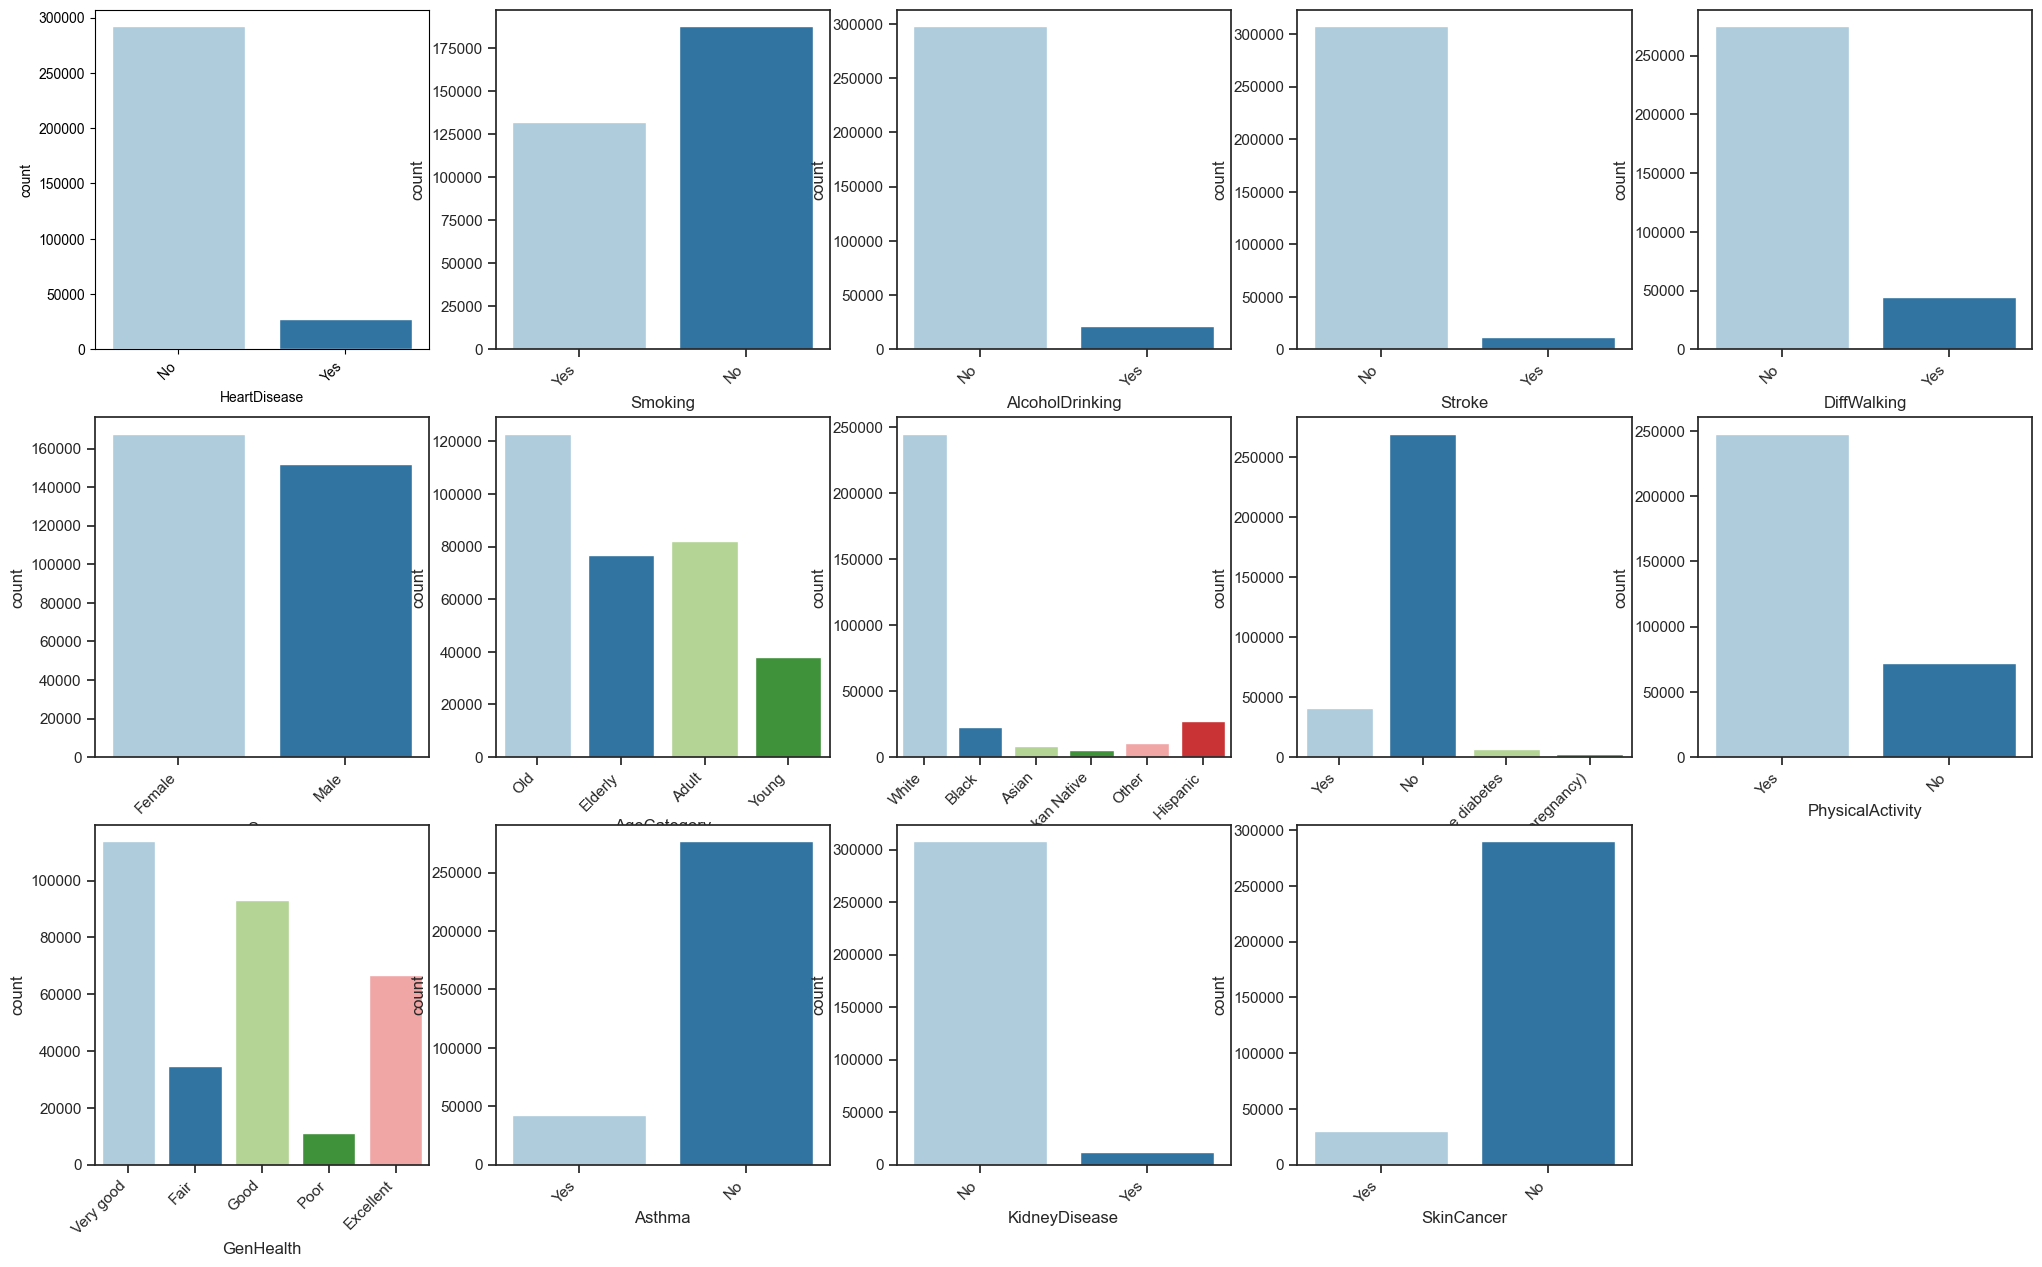

In [8]:
categorical_features = df.select_dtypes(include=[object])

plt.figure(figsize = (25,15))
for i, feature in enumerate(categorical_features):
      plt.subplot(3,5,i + 1)
      sns.set(palette='Paired')
      sns.set_style("ticks")
      ax = sns.countplot(x = feature, data = df)#, hue = 'Stroke')#, color='#221C35')
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

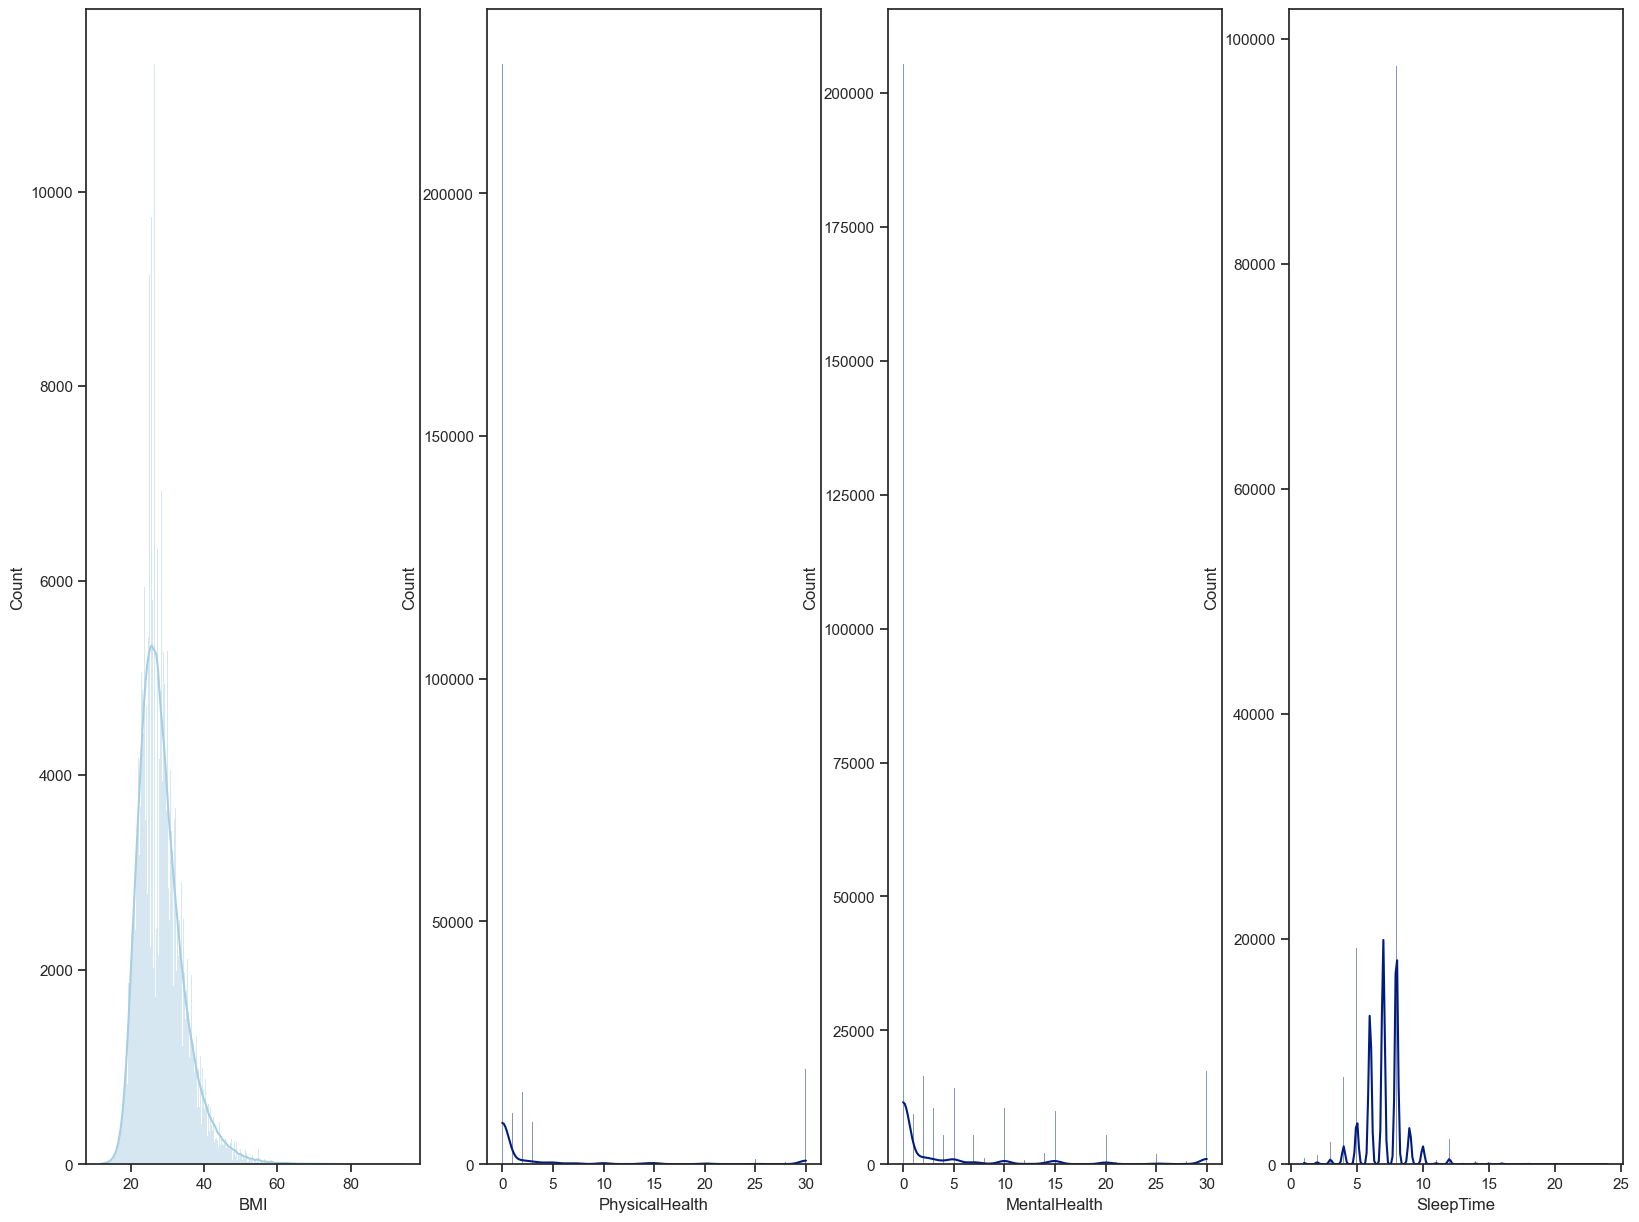

In [8]:
numeric_features = df.select_dtypes(include=[np.number])

plt.figure(figsize = (25,15))
for i, feature in enumerate(numeric_features.columns):
    plt.subplot(1,5,i + 1)
    sns.set(palette='dark')
    sns.set_style("ticks")
    sns.histplot(df[feature],kde=True)
    plt.xlabel(feature)
    plt.ylabel("Count")

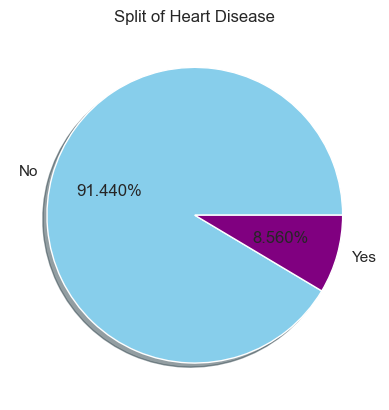

In [18]:
plt.pie(x = df['HeartDisease'].value_counts() ,autopct='%1.3f%%' ,labels=['No', 'Yes'], colors=['skyblue', 'purple'], shadow=True)
plt.title('Split of Heart Disease')
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder



le = LabelEncoder()

# Get a list of categorical column names
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_cols:
    if len(df[col].unique()) <= 2:
        # label encode binary variables
        df[col] = le.fit_transform(df[col])
    else:
        # one-hot encode non-binary variables
        df = pd.get_dummies(df, columns=[col])

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3,30,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20,30,0,1,1,...,1,0,0,1,0,0,1,0,0,0
3,0,24.21,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,0,23.71,0,0,0,28,0,1,0,1,...,1,1,0,0,0,0,0,0,0,1


In [20]:
# Split the Data into input and output

y = df.iloc[:, 0]  
X = df.iloc[:, 1:]  
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,SleepTime,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,16.60,1,0,0,3,30,0,0,1,5,...,1,0,0,1,0,0,0,0,0,1
1,20.34,0,0,1,0,0,0,0,1,7,...,1,1,0,0,0,0,0,0,0,1
2,26.58,1,0,0,20,30,0,1,1,8,...,1,0,0,1,0,0,1,0,0,0
3,24.21,0,0,0,0,0,0,0,0,6,...,1,1,0,0,0,0,0,1,0,0
4,23.71,0,0,0,28,0,1,0,1,8,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7,0,1,1,0,6,...,0,0,0,1,0,0,1,0,0,0
319791,29.84,1,0,0,0,0,0,1,1,5,...,0,1,0,0,0,0,0,0,0,1
319792,24.24,0,0,0,0,0,0,0,1,6,...,0,1,0,0,0,0,0,1,0,0
319793,32.81,0,0,0,0,0,0,0,0,12,...,0,1,0,0,0,0,0,1,0,0


<AxesSubplot:>

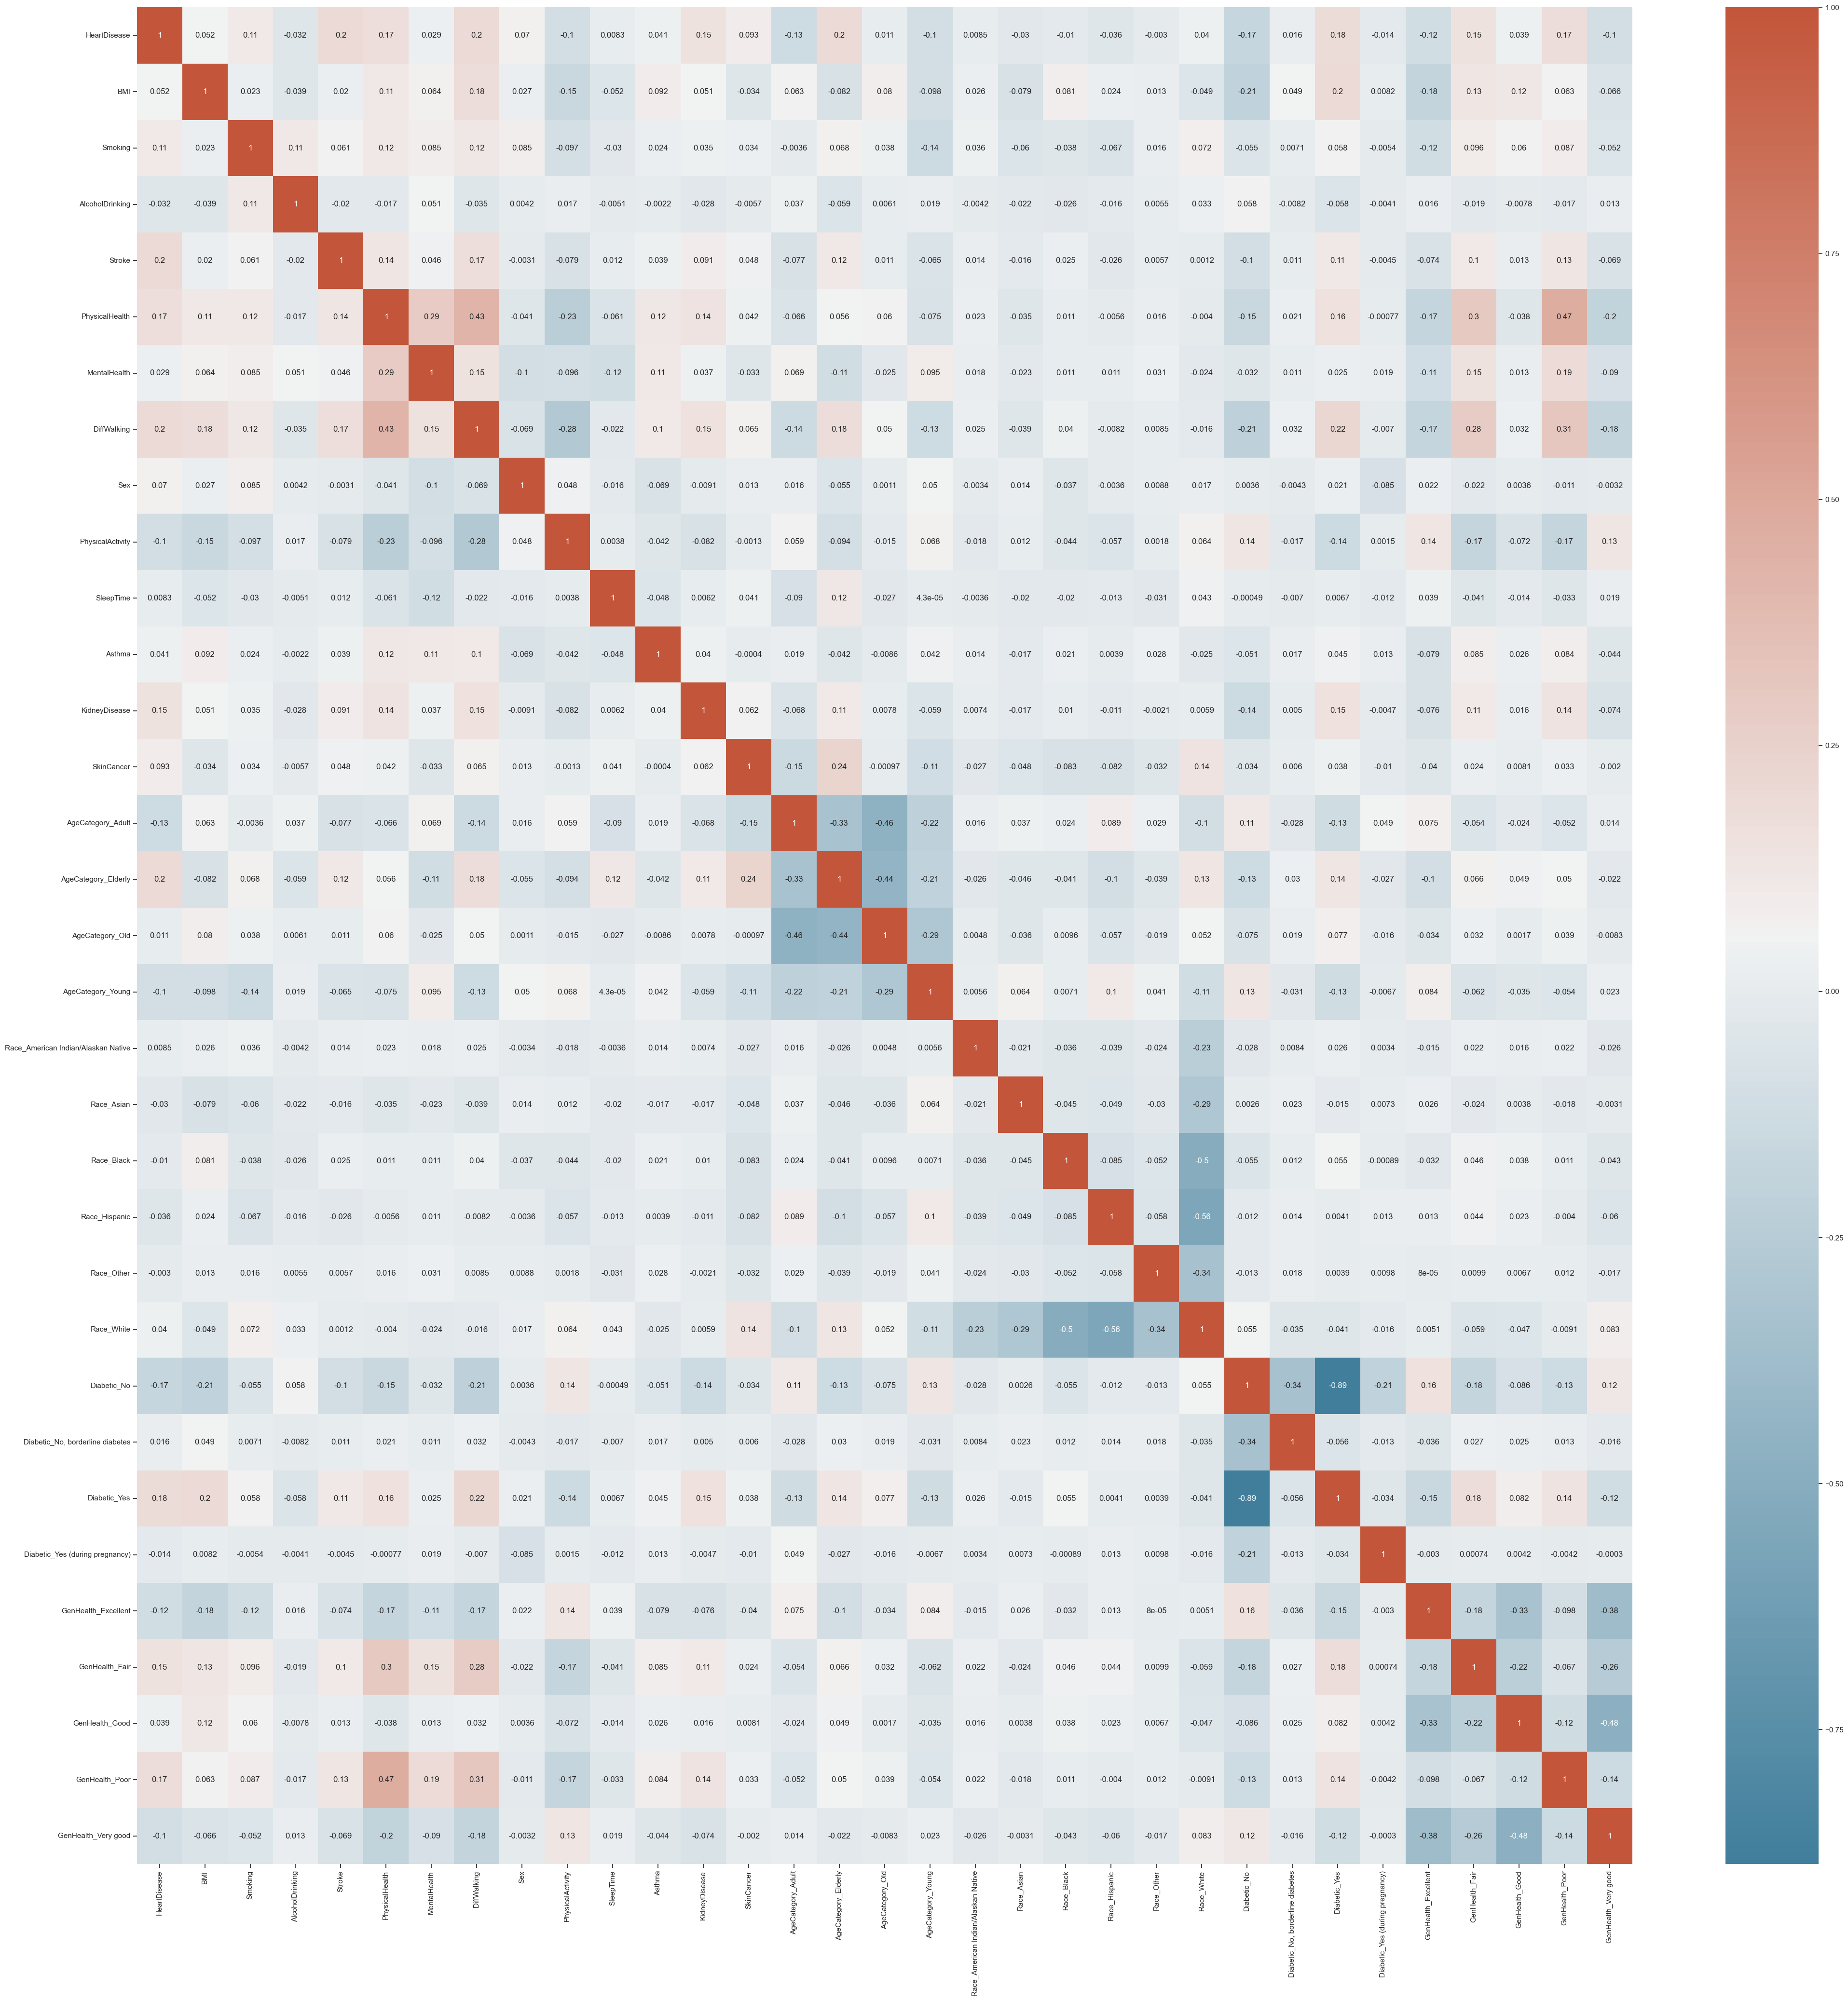

In [13]:
df_new = X.copy()
df_new[y.name] = y.copy()
cols = list(df_new.columns)
cols = [cols[-1]] + cols[:-1]
df_new = df_new[cols]
corr = df_new.corr()

f, ax = plt.subplots(figsize=(50, 50))

# mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True, cmap=cmap)

In [22]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from imblearn.over_sampling import SMOTE

In [23]:
# split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
rf_classifier = RandomForestClassifier(random_state=42)

In [39]:
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred1 = rf_classifier.predict(X_test_scaled)

# Calculate the train accuracy of the classifier
tr_accuracy1 = rf_classifier.score(X_train_scaled, y_train)

# Calculate the accuracy of the classifier
ts_accuracy1 = accuracy_score(y_test, y_pred)

print("Train Accuracy:", f'{round(tr_accuracy1, 4) * 100}%')
print("Test Accuracy:", f'{round(ts_accuracy1, 4) * 100}%')

Train Accuracy: 99.42%
Test Accuracy: 90.10000000000001%


Confusion Matrix:


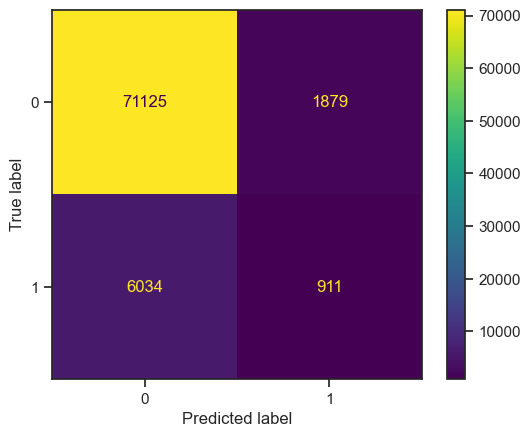

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     73004
           1       0.33      0.13      0.19      6945

    accuracy                           0.90     79949
   macro avg       0.62      0.55      0.57     79949
weighted avg       0.87      0.90      0.88     79949



In [40]:
from sklearn.metrics import confusion_matrix, auc, roc_curve, precision_score, recall_score
c_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
print("Confusion Matrix:")
plt.show()

from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))

In [25]:
# Fix the unbalanced data
oversample = SMOTE(k_neighbors=55, random_state=42)
print(f"{oversample}")

SMOTE(k_neighbors=55, random_state=42)


In [26]:
# handling the class imbalance
X_features_smoted, y_target_smoted = oversample.fit_resample(X_train, y_train)
y_target_smoted = pd.Series(y_target_smoted)

print(f'Number of records before using SMOTE\n{y.value_counts()}\n')
print(f'Number of records after using SMOTE\n{y_target_smoted.value_counts()}')

Number of records before using SMOTE
0    292422
1     27373
Name: HeartDisease, dtype: int64

Number of records after using SMOTE
1    219418
0    219418
Name: HeartDisease, dtype: int64


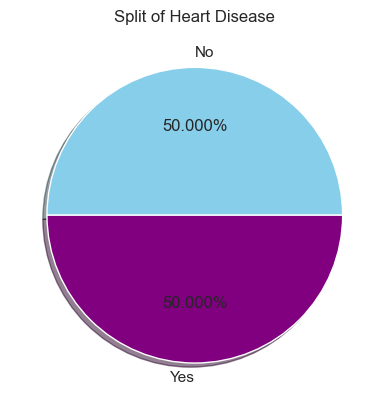

In [27]:
# Show split after the balancing

plt.pie(x = y_target_smoted.value_counts() ,autopct='%1.3f%%' ,labels=['No', 'Yes'], colors=['skyblue', 'purple'], shadow=True)
plt.title('Split of Heart Disease')
plt.show()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_features_smoted, y_target_smoted, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_scaled)

# Calculate the train accuracy of the classifier
tr_accuracy = rf_classifier.score(X_train_scaled, y_train)

# Calculate the accuracy of the classifier
ts_accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy:", f'{round(tr_accuracy, 4) * 100}%')
print("Test Accuracy:", f'{round(ts_accuracy, 4) * 100}%')

Train Accuracy: 99.63%
Test Accuracy: 89.03999999999999%


Confusion Matrix:


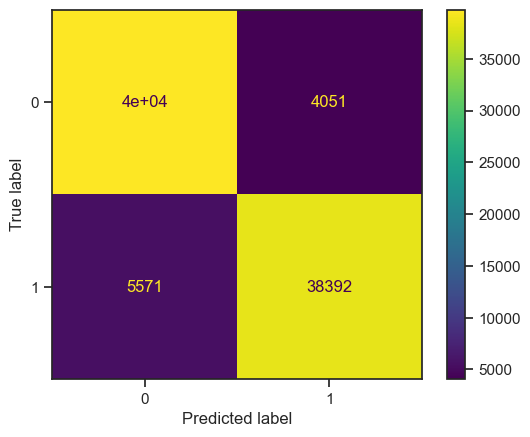

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89     43805
           1       0.90      0.87      0.89     43963

    accuracy                           0.89     87768
   macro avg       0.89      0.89      0.89     87768
weighted avg       0.89      0.89      0.89     87768



In [46]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
print("Confusion Matrix:")
plt.show()

from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))

In [47]:
# Logistic Regression

lr = LogisticRegressionCV(solver='lbfgs')
X_train, X_test, y_train, y_test = train_test_split(X_features_smoted, y_target_smoted, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
# Get the accuracy for Logistic Regression

lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

# Calculate the train accuracy of the classifier
tr_accuracy = lr.score(X_train_scaled, y_train)

# Calculate the accuracy of the classifier
ts_accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy:", f'{round(tr_accuracy, 4) * 100}%')
print("Test Accuracy:", f'{round(ts_accuracy, 4) * 100}%')

Train Accuracy: 86.64%
Test Accuracy: 86.58%


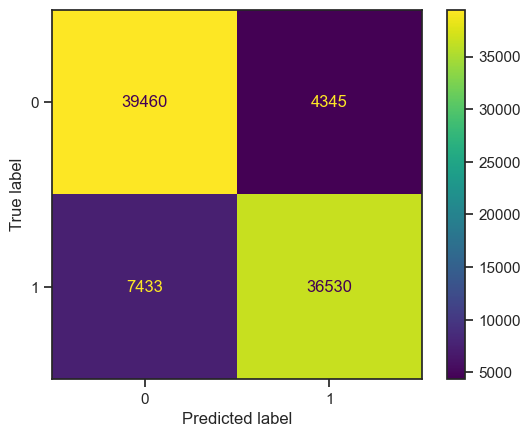

In [49]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
plt.show()

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87     43805
           1       0.89      0.83      0.86     43963

    accuracy                           0.87     87768
   macro avg       0.87      0.87      0.87     87768
weighted avg       0.87      0.87      0.87     87768



In [50]:
from sklearn.tree import DecisionTreeClassifier
d_t = DecisionTreeClassifier()

# cv = KFold(n_splits=10, random_state=None,shuffle=False)
# params_dt = {"criterion":['gini','entropy'], "max_depth": [100], "random_state": [1024]}
# d_t_cv = GridSearchCV( d_t,
#                             param_grid = params_dt,
#                             cv = cv,
#                             n_jobs = -1,
#                             verbose = 1 )

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_features_smoted, y_target_smoted, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
d_t.fit(X_train_scaled, y_train)

y_pred = d_t.predict(X_test_scaled)

# Calculate the train accuracy of the classifier
tr_accuracy = d_t.score(X_train_scaled, y_train)

# Calculate the accuracy of the classifier
ts_accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy:", f'{round(tr_accuracy, 4) * 100}%')
print("Test Accuracy:", f'{round(ts_accuracy, 4) * 100}%')

Train Accuracy: 99.64%
Test Accuracy: 87.53%


In [80]:
# print("Best params: ", d_t_cv.best_params_)

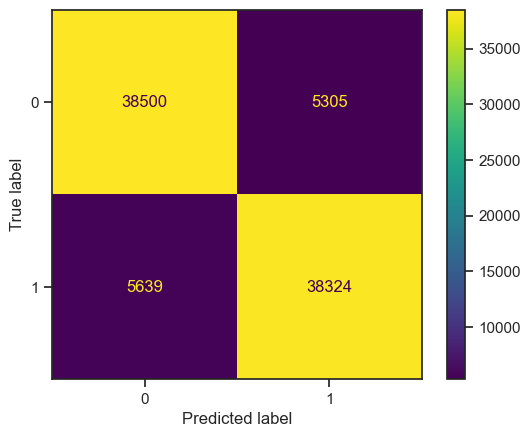

In [53]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
plt.show()

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88     43805
           1       0.88      0.87      0.88     43963

    accuracy                           0.88     87768
   macro avg       0.88      0.88      0.88     87768
weighted avg       0.88      0.88      0.88     87768



In [30]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

# Fit the model on the training data
xgb.fit(X_train_scaled, y_train)

y_pred = xgb.predict(X_test_scaled)

# Calculate the accuracy score on the training data
train_score = xgb.score(X_train_scaled, y_train)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the test data
test_score = xgb.score(X_test_scaled, y_test)
print("Testing accuracy:", test_score)

Training accuracy: 0.902990303872754
Testing accuracy: 0.8973885698660103


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_features_smoted, y_target_smoted, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

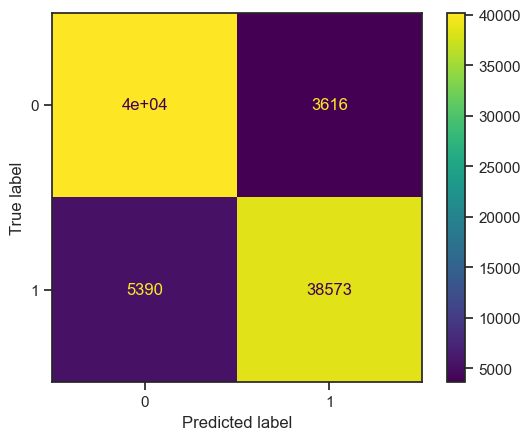

In [32]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
plt.show()

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     43805
           1       0.91      0.88      0.90     43963

    accuracy                           0.90     87768
   macro avg       0.90      0.90      0.90     87768
weighted avg       0.90      0.90      0.90     87768



In [58]:
# HyperParameter Change 1 Test 1
rf_classifier2 = RandomForestClassifier(criterion="entropy")

rf_classifier2.fit(X_train_scaled, y_train)

y_pred = rf_classifier2.predict(X_test_scaled)

# Calculate the train accuracy of the classifier
tr_accuracy = rf_classifier2.score(X_train_scaled, y_train)

# Calculate the accuracy of the classifier
ts_accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy:", f'{round(tr_accuracy, 4) * 100}%')
print("Test Accuracy:", f'{round(ts_accuracy, 4) * 100}%')

Train Accuracy: 99.63%
Test Accuracy: 89.08%


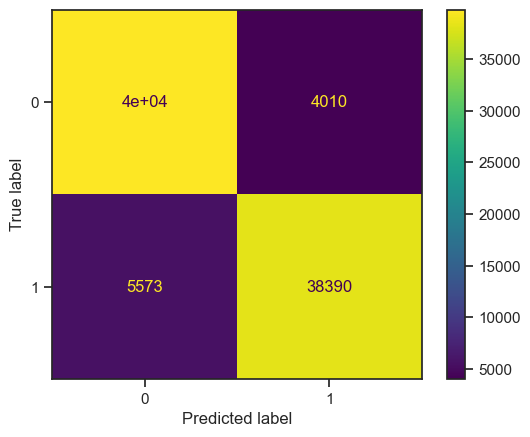

In [59]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
plt.show()

In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     43805
           1       0.91      0.87      0.89     43963

    accuracy                           0.89     87768
   macro avg       0.89      0.89      0.89     87768
weighted avg       0.89      0.89      0.89     87768



In [61]:
# HyperParameter Change 1 Test 2
rf_classifier3 = RandomForestClassifier(criterion="gini")

rf_classifier3.fit(X_train_scaled, y_train)

y_pred = rf_classifier3.predict(X_test_scaled)

# Calculate the train accuracy of the classifier
tr_accuracy = rf_classifier3.score(X_train_scaled, y_train)

# Calculate the accuracy of the classifier
ts_accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy:", f'{round(tr_accuracy, 4) * 100}%')
print("Test Accuracy:", f'{round(ts_accuracy, 4) * 100}%')

Train Accuracy: 99.63%
Test Accuracy: 89.03999999999999%


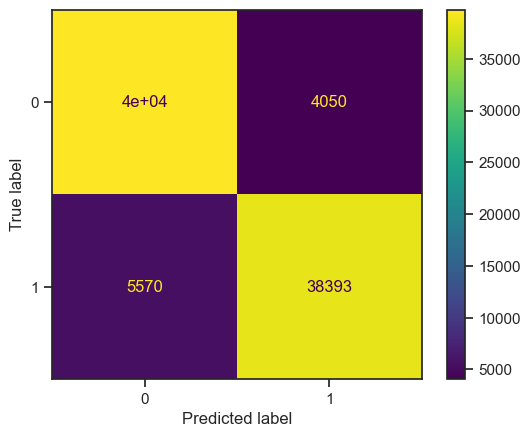

In [62]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
plt.show()

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     43805
           1       0.90      0.87      0.89     43963

    accuracy                           0.89     87768
   macro avg       0.89      0.89      0.89     87768
weighted avg       0.89      0.89      0.89     87768



In [64]:
# HyperParameter Change 2 Test 1
rf_classifier4 = RandomForestClassifier(n_estimators=50)
rf_classifier4.fit(X_train_scaled, y_train)

y_pred = rf_classifier4.predict(X_test_scaled)

# Calculate the train accuracy of the classifier
tr_accuracy = rf_classifier4.score(X_train_scaled, y_train)

# Calculate the accuracy of the classifier
ts_accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy:", f'{round(tr_accuracy, 4) * 100}%')
print("Test Accuracy:", f'{round(ts_accuracy, 4) * 100}%')

Train Accuracy: 99.59%
Test Accuracy: 89.01%


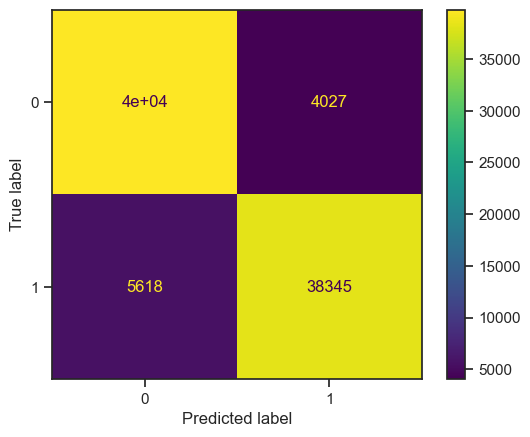

In [65]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
plt.show()

In [66]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     43805
           1       0.90      0.87      0.89     43963

    accuracy                           0.89     87768
   macro avg       0.89      0.89      0.89     87768
weighted avg       0.89      0.89      0.89     87768



In [67]:
# HyperParameter Change 2 Test 2
rf_classifier5 = RandomForestClassifier(n_estimators=150)
rf_classifier5.fit(X_train_scaled, y_train)

y_pred = rf_classifier5.predict(X_test_scaled)

# Calculate the train accuracy of the classifier
tr_accuracy = rf_classifier5.score(X_train_scaled, y_train)

# Calculate the accuracy of the classifier
ts_accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy:", f'{round(tr_accuracy, 4) * 100}%')
print("Test Accuracy:", f'{round(ts_accuracy, 4) * 100}%')

Train Accuracy: 99.64%
Test Accuracy: 89.08%


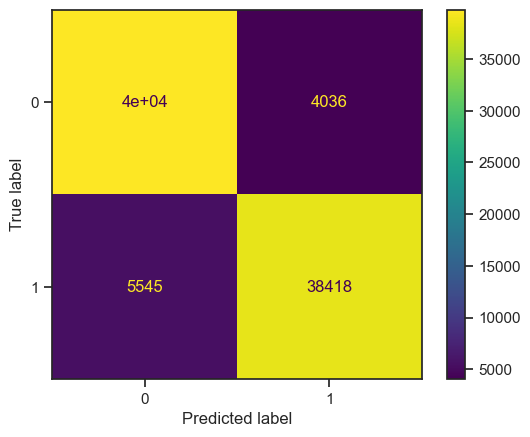

In [68]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
plt.show()

In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     43805
           1       0.90      0.87      0.89     43963

    accuracy                           0.89     87768
   macro avg       0.89      0.89      0.89     87768
weighted avg       0.89      0.89      0.89     87768



In [70]:
# HyperParameter Change 2 Test 3
rf_classifier6 = RandomForestClassifier(n_estimators=250)
rf_classifier6.fit(X_train_scaled, y_train)

y_pred = rf_classifier6.predict(X_test_scaled)

# Calculate the train accuracy of the classifier
tr_accuracy = rf_classifier6.score(X_train_scaled, y_train)

# Calculate the accuracy of the classifier
ts_accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy:", f'{round(tr_accuracy, 4) * 100}%')
print("Test Accuracy:", f'{round(ts_accuracy, 4) * 100}%')

Train Accuracy: 99.64%
Test Accuracy: 89.1%


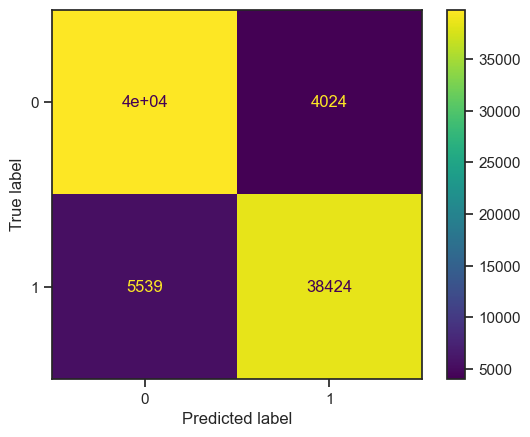

In [71]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
plt.show()

In [40]:
# HyperParameter Change Request
rf_classifier7 = RandomForestClassifier(n_estimators=500)
rf_classifier7.fit(X_train_scaled, y_train)

y_pred = rf_classifier7.predict(X_test_scaled)

# Calculate the train accuracy of the classifier
tr_accuracy = rf_classifier7.score(X_train_scaled, y_train)

# Calculate the accuracy of the classifier
ts_accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy:", f'{round(tr_accuracy, 4) * 100}%')
print("Test Accuracy:", f'{round(ts_accuracy, 4) * 100}%')

Train Accuracy: 99.64%
Test Accuracy: 89.08%


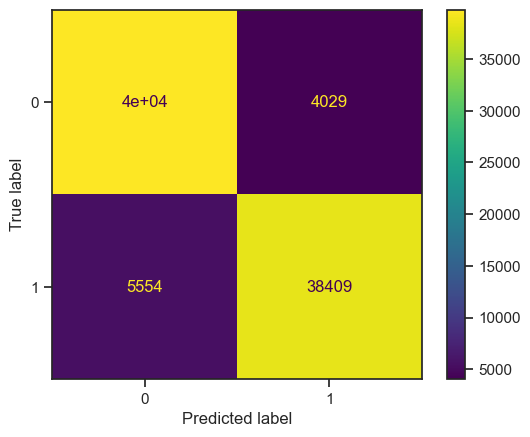

In [42]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
plt.show()

In [41]:
# HyperParameter Change Request

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     43805
           1       0.91      0.87      0.89     43963

    accuracy                           0.89     87768
   macro avg       0.89      0.89      0.89     87768
weighted avg       0.89      0.89      0.89     87768



In [104]:
# HyperParameter Change 3 Test 1

rf_classifier7 = RandomForestClassifier(max_features='sqrt')
rf_classifier7.fit(X_train_scaled, y_train)

y_pred = rf_classifier7.predict(X_test_scaled)

# Calculate the train accuracy of the classifier
tr_accuracy = rf_classifier7.score(X_train_scaled, y_train)

# Calculate the accuracy of the classifier
ts_accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy:", f'{round(tr_accuracy, 4) * 100}%')
print("Test Accuracy:", f'{round(ts_accuracy, 4) * 100}%')

Train Accuracy: 99.63%
Test Accuracy: 89.08%


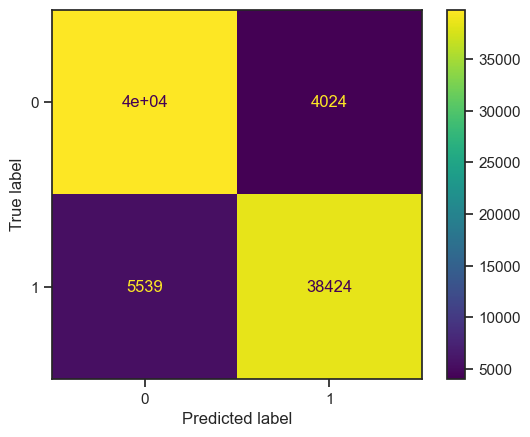

In [73]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
plt.show()

In [74]:
# HyperParameter Change 3 Test 1

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     43805
           1       0.91      0.87      0.89     43963

    accuracy                           0.89     87768
   macro avg       0.89      0.89      0.89     87768
weighted avg       0.89      0.89      0.89     87768



In [75]:
# HyperParameter Change 3 Test 2

rf_classifier8 = RandomForestClassifier(max_features='log2')
rf_classifier8.fit(X_train_scaled, y_train)

y_pred = rf_classifier8.predict(X_test_scaled)

# Calculate the train accuracy of the classifier
tr_accuracy = rf_classifier8.score(X_train_scaled, y_train)

# Calculate the accuracy of the classifier
ts_accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy:", f'{round(tr_accuracy, 4) * 100}%')
print("Test Accuracy:", f'{round(ts_accuracy, 4) * 100}%')

Train Accuracy: 99.63%
Test Accuracy: 89.07000000000001%


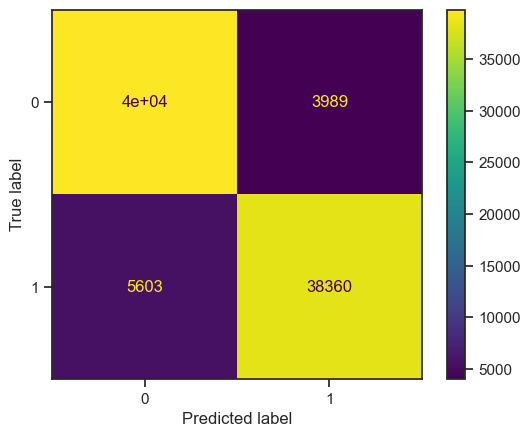

In [76]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
plt.show()

In [77]:
# HyperParameter Change 3 Test 2

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     43805
           1       0.91      0.87      0.89     43963

    accuracy                           0.89     87768
   macro avg       0.89      0.89      0.89     87768
weighted avg       0.89      0.89      0.89     87768



In [78]:
# HyperParameter Change 3 Test 3

rf_classifier8 = RandomForestClassifier(max_features='auto')
rf_classifier8.fit(X_train_scaled, y_train)

y_pred = rf_classifier8.predict(X_test_scaled)

# Calculate the train accuracy of the classifier
tr_accuracy = rf_classifier8.score(X_train_scaled, y_train)

# Calculate the accuracy of the classifier
ts_accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy:", f'{round(tr_accuracy, 4) * 100}%')
print("Test Accuracy:", f'{round(ts_accuracy, 4) * 100}%')

Train Accuracy: 99.63%
Test Accuracy: 89.02%


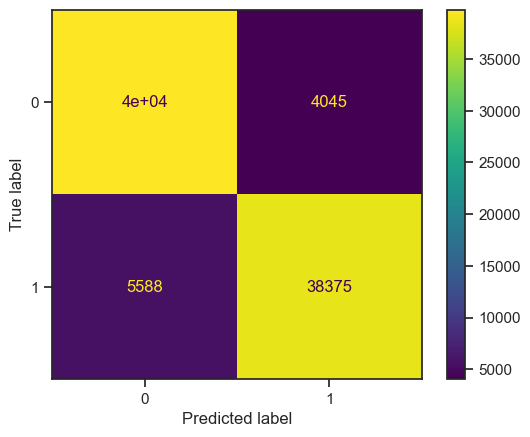

In [79]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
plt.show()

In [80]:
# HyperParameter Change 3 Test 3

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     43805
           1       0.90      0.87      0.89     43963

    accuracy                           0.89     87768
   macro avg       0.89      0.89      0.89     87768
weighted avg       0.89      0.89      0.89     87768



In [34]:
from xgboost import XGBClassifier

# Define the hyperparameter value you want to set
max_depth_value = 5 

# Create the XGBoost classifier with the specified hyperparameter
xgb2 = XGBClassifier(max_depth=max_depth_value)

# Fit the model on the training data
xgb2.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = xgb2.predict(X_test_scaled)

# Calculate the accuracy score on the training data
train_score = xgb2.score(X_train_scaled, y_train)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the test data
test_score = xgb2.score(X_test_scaled, y_test)
print("Testing accuracy:", test_score)

Training accuracy: 0.8921291601627035
Testing accuracy: 0.8882622368061253


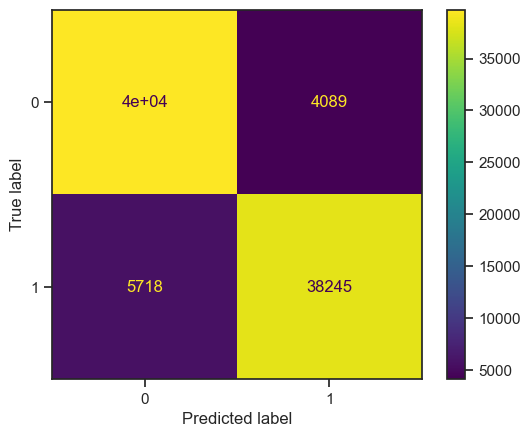

In [35]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
plt.show()

In [36]:
# XG-Boost HyperParameter Change 1

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     43805
           1       0.90      0.87      0.89     43963

    accuracy                           0.89     87768
   macro avg       0.89      0.89      0.89     87768
weighted avg       0.89      0.89      0.89     87768



In [37]:
from xgboost import XGBClassifier

# Define the hyperparameter value you want to set
max_depth_value = 20

# Create the XGBoost classifier with the specified hyperparameter
xgb3 = XGBClassifier(max_depth=max_depth_value)

# Fit the model on the training data
xgb3.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = xgb3.predict(X_test_scaled)

# Calculate the accuracy score on the training data
train_score = xgb3.score(X_train_scaled, y_train)
print("Training accuracy:", train_score)

# Calculate the accuracy score on the test data
test_score = xgb3.score(X_test_scaled, y_test)
print("Testing accuracy:", test_score)

Training accuracy: 0.9849744209099092
Testing accuracy: 0.9307378543432686


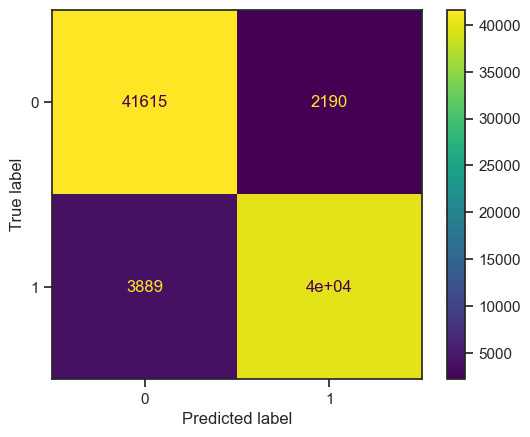

In [39]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)

cm_display.plot()
plt.show()

In [38]:
# XG-Boost HyperParameter Change 2

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43805
           1       0.95      0.91      0.93     43963

    accuracy                           0.93     87768
   macro avg       0.93      0.93      0.93     87768
weighted avg       0.93      0.93      0.93     87768

